In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
all_hints = pd.read_csv("../data/HINTS_erdos.csv")
# all_hints =  all_hints.drop(['APP_REGION', 'PERSONID', 'HHID'], axis=1, inplace=False)

In [5]:
print(all_hints.shape)
print(all_hints.count())

(3630, 357)
HHID                3630
PERSONID            3630
Stratum             3630
APP_REGION           259
HIGHSPANLI          3630
                    ... 
AgeDX               3630
TimeSinceDX         3630
smokeStat           3630
PHQ4                3630
IncomeRanges_IMP    3630
Length: 357, dtype: int64


## **Data subset on "Cancer Attention Info + Demographic info"**


In [14]:
base_list = ['Age','BMI','CancerAttention_HealthNews','CancerAttention_Internet','CancerAttention_LocalTV','CancerAttention_NatTV','CancerAttention_OnlineNews','CancerAttention_PrintNews','CENSDIV','EducA','EverHadCancer','GenderC','HHInc','InternetCancerInfoSelf','InternetCancerInfoSite']
hints_base = pd.DataFrame(all_hints, columns = base_list)
print(hints_base.shape)

(3630, 15)


In [15]:
#set all the features with numerical values to integers  and character as categorical

# Convert numerical features to integers
numerical_features = hints_base.select_dtypes(include=['int64', 'float64']).columns
hints_base[numerical_features] = hints_base[numerical_features].astype('int32')

# Convert character features to categorical
character_features = hints_base.select_dtypes(include=['object']).columns
hints_base[character_features] = hints_base[character_features].astype('category')


In [17]:
#turn all values less than 0 to NA in integer type features
hints_base[numerical_features] = hints_base[numerical_features].map(lambda x: np.nan if x < 0 else x)
hints_base.head()

Age   BMI  CancerAttention_HealthNews  CancerAttention_Internet  \
0  29.0  29.0                         1.0                       1.0   
1  69.0  27.0                         1.0                       2.0   
2  32.0  20.0                         2.0                       2.0   
3  41.0  22.0                         1.0                       2.0   
4  46.0  28.0                         2.0                       2.0   

   CancerAttention_LocalTV  CancerAttention_NatTV  CancerAttention_OnlineNews  \
0                      3.0                    3.0                         3.0   
1                      1.0                    1.0                         3.0   
2                      2.0                    2.0                         2.0   
3                      3.0                    2.0                         2.0   
4                      2.0                    2.0                         2.0   

   CancerAttention_PrintNews  CENSDIV  EducA  EverHadCancer  GenderC  HHInc  \
0                        3.0        5    3.0            2.0      2.0    5.0   
1                        3.0        2    2.0            2.0      2.0    NaN   
2                        2.0        3    4.0            2.0      2.0    5.0   
3                        2.0        5    4.0            2.0      2.0    5.0   
4                        2.0        5    NaN            2.0      2.0    3.0   

   InternetCancerInfoSelf  InternetCancerInfoSite  
0                     2.0                     1.0  
1                     2.0                     2.0  
2                     1.0                     2.0  
3                     2.0                     2.0  
4                     2.0                     2.0

## **Data subset on "Medical Conditions"**


In [21]:
YourOverallHealth = (["GeneralHealth", "OwnAbilityTakeCareHealth", "MedConditions_Diabetes", "MedConditions_HighBP", "MedConditions_HeartCondition", "MedConditions_LungDisease", "MedConditions_Arthritis", "MedConditions_Depression", "SleepWorkdayHr", "SleepWorkdayMn", "SleepWeekendHr", "SleepWeekendMn", "Height_Feet", "Height_Inches", "Weight", "WeightIntention", "WeightOpinion", "LittleInterest", "Hopeless", "Nervous", "Worrying", "EmotionalSupport", "TalkHealthFriends", "HelpDailyChores"])

MedicalConditions = (["GeneralHealth", "OwnAbilityTakeCareHealth", "MedConditions_Diabetes", "MedConditions_HighBP", "MedConditions_HeartCondition", "MedConditions_LungDisease", "MedConditions_Arthritis", "MedConditions_Depression"])#, "LittleInterest", "Hopeless", "Nervous", "Worrying", "EmotionalSupport", "TalkHealthFriends", "HelpDailyChores"])


In [22]:
hints_health = all_hints[MedicalConditions]

In [26]:
#set all the features with numerical values to integers  and character as categorical

# # Convert numerical features to integers
num_features = hints_health.select_dtypes(include=['int64', 'float64']).columns
hints_health[num_features] = hints_health[num_features].astype('int32')

# Convert character features to categorical
char_features = hints_health.select_dtypes(include=['object']).columns
hints_health[char_features] = hints_health[char_features].astype('category')


### **Visualising NAs**

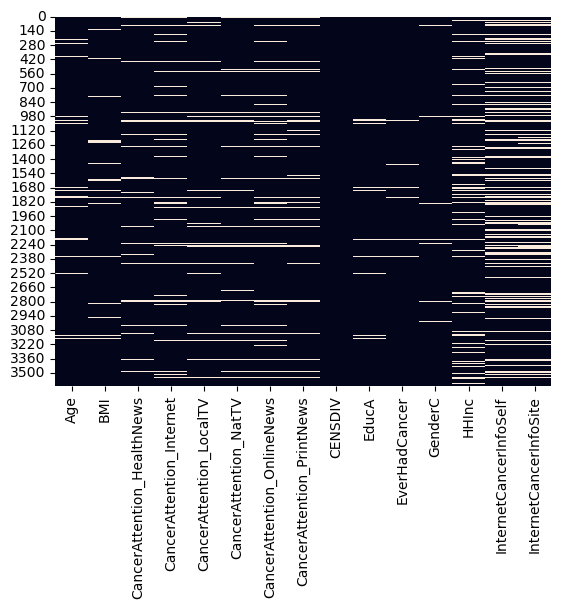

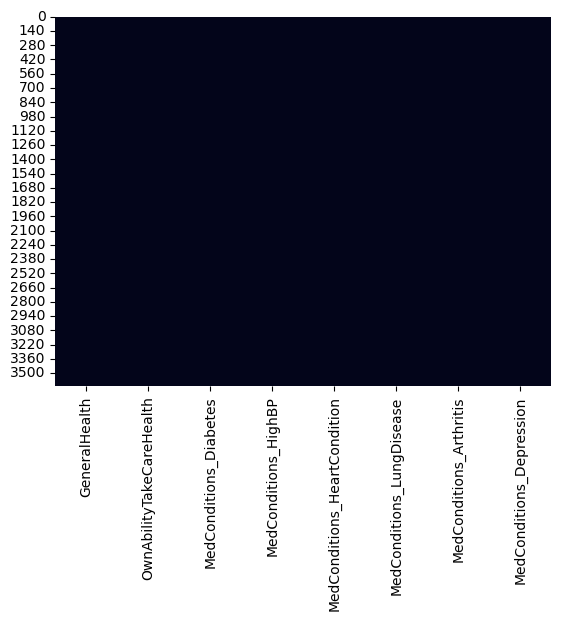

In [29]:
sns.heatmap(hints_base.isnull(), cbar=False)
plt.show()

sns.heatmap(hints_health.isnull(), cbar=False)
plt.show()

**Removing the colums with high number of missing values**

In [30]:
print(hints_base.isna().sum())
print("-----------------------------")
print(hints_health.isna().sum())

Age                           119
BMI                           178
CancerAttention_HealthNews    195
CancerAttention_Internet      272
CancerAttention_LocalTV       210
CancerAttention_NatTV         230
CancerAttention_OnlineNews    273
CancerAttention_PrintNews     250
CENSDIV                         0
EducA                          89
EverHadCancer                  31
GenderC                        68
HHInc                         480
InternetCancerInfoSelf        929
InternetCancerInfoSite        950
dtype: int64
-----------------------------
GeneralHealth                   0
OwnAbilityTakeCareHealth        0
MedConditions_Diabetes          0
MedConditions_HighBP            0
MedConditions_HeartCondition    0
MedConditions_LungDisease       0
MedConditions_Arthritis         0
MedConditions_Depression        0
dtype: int64


In [31]:
print(hints_base.InternetCancerInfoSelf.isna().sum())
print(hints_base.InternetCancerInfoSite.isna().sum())
# print(hints_base.HHInc.isna().sum())

929
950


In [34]:
hints_base = hints_base.drop(['InternetCancerInfoSelf', 'InternetCancerInfoSite'], axis=1, inplace=False)
#investigat whether to drop HHInc

In [35]:
print(hints_base.shape)
print(hints_health.shape)

(3630, 13)
(3630, 8)


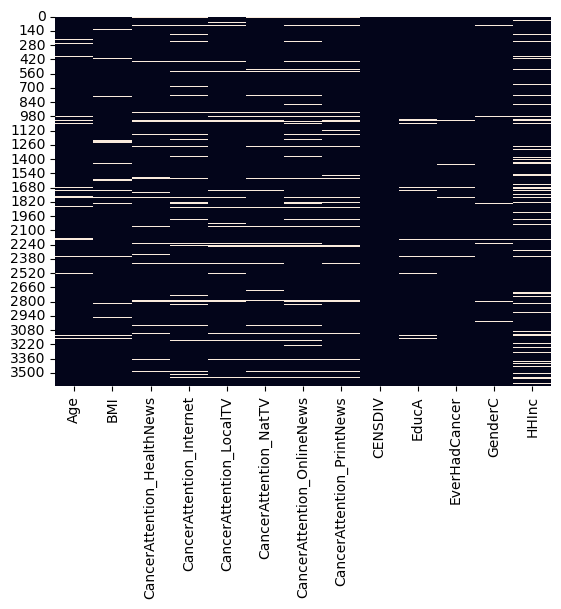

In [36]:
sns.heatmap(hints_base.isnull(), cbar=False)
plt.show()

In [49]:
hints_final = pd.concat([hints_base, hints_health], axis=1)


In [50]:
print(hints_final.shape)
hints_final.head()

(3630, 21)


Age   BMI  CancerAttention_HealthNews  CancerAttention_Internet  \
0  29.0  29.0                         1.0                       1.0   
1  69.0  27.0                         1.0                       2.0   
2  32.0  20.0                         2.0                       2.0   
3  41.0  22.0                         1.0                       2.0   
4  46.0  28.0                         2.0                       2.0   

   CancerAttention_LocalTV  CancerAttention_NatTV  CancerAttention_OnlineNews  \
0                      3.0                    3.0                         3.0   
1                      1.0                    1.0                         3.0   
2                      2.0                    2.0                         2.0   
3                      3.0                    2.0                         2.0   
4                      2.0                    2.0                         2.0   

   CancerAttention_PrintNews  CENSDIV  EducA  ...  GenderC  HHInc  \
0                        3.0        5    3.0  ...      2.0    5.0   
1                        3.0        2    2.0  ...      2.0    NaN   
2                        2.0        3    4.0  ...      2.0    5.0   
3                        2.0        5    4.0  ...      2.0    5.0   
4                        2.0        5    NaN  ...      2.0    3.0   

   GeneralHealth  OwnAbilityTakeCareHealth  MedConditions_Diabetes  \
0              2                         1                       2   
1              2                         1                       2   
2              2                         2                       2   
3              2                         2                       2   
4              3                         2                       2   

   MedConditions_HighBP  MedConditions_HeartCondition  \
0                     2                             2   
1                     1                             2   
2                     2                             2   
3                     2                             2   
4                     1                             2   

   MedConditions_LungDisease  MedConditions_Arthritis  \
0                          2                        2   
1                          2                        1   
2                          1                        2   
3                          2                        2   
4                          2                        2   

   MedConditions_Depression  
0                         1  
1                         1  
2                         2  
3                         2  
4                         2  

[5 rows x 21 columns]

In [51]:
def missingValues(missingvalues):
    if (missing_values > 0).any():
        columns_with_missing_values = missing_values[missing_values > 0].index.tolist()
        print("Columns with missing values: \n", columns_with_missing_values)
    else:
        print("No columns have missing values.")
    return

missing_values = hints_final.isna().sum()
missingValues(missing_values)

# hints_final = hints_final.dropna()
# missingValues(hints_final.isna().sum())


Columns with missing values: 
 ['Age', 'BMI', 'CancerAttention_HealthNews', 'CancerAttention_Internet', 'CancerAttention_LocalTV', 'CancerAttention_NatTV', 'CancerAttention_OnlineNews', 'CancerAttention_PrintNews', 'EducA', 'EverHadCancer', 'GenderC', 'HHInc']


In [59]:
hints_final = hints_final.dropna()
print(hints_final.shape)

missing_values = hints_final.isna().sum()
missingValues(missing_values)


(2678, 21)
No columns have missing values.


In [60]:
hints_final.to_csv("final_hints_dataset.csv")

# Feature Ranking Process

In [107]:
from sklearn.feature_selection import RFE
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.tree import plot_tree


In [74]:
#newFeatures = (["UseInternet", "Internet_DialUp", "Internet_BroadBnd", "Internet_Cell", "Internet_WiFi", "Internet_Other", "InternetCancerInfoSelf", "InternetCancerInfoSite"])
#hints_UIFI_New = hints_UIFI[newFeatures]
#hints_UIFI_New


In [88]:
X,y = hints_final.drop("EverHadCancer", axis=1), hints_final.EverHadCancer

In [92]:
print(X.shape, y.shape, sep='\n')

(2678, 20)
(2678,)


In [120]:
random_state_ = 0
estimator1 = LinearSVC(C=1000, max_iter=100000, dual=True)
estimator2 = DecisionTreeClassifier(max_depth = 6, random_state=random_state_)

estimators = [estimator1]
estimators.extend([estimator2])

estimators.extend([
    LogisticRegression(max_iter=100000),
    RandomForestClassifier(n_estimators=5, random_state=random_state_)
])
estimators

[LinearSVC(C=1000, dual=True, max_iter=100000),
 DecisionTreeClassifier(max_depth=6, random_state=0),
 LogisticRegression(max_iter=100000),
 RandomForestClassifier(n_estimators=5, random_state=0)]

## Finding top10 Features

In [121]:
# finding top10 Features
selectors = []
selected_features = []
for estimator in estimators:
    # Apply RFE to the LinearSVC model
    selector = RFE(estimator=estimator, n_features_to_select=10, step=1)
    
    # Create a pipeline with StandardScaler and RFE selector
    pipeline = make_pipeline(StandardScaler(), selector)
    
    # Fit the pipeline to the training data
    pipeline.fit(X, y)
    # Evaluate the model
    
    print("accuracy:", pipeline.score(X, y))
    
    # Append the fitted selector to the list
    selectors.append(selector)
    # Get the selected features and store them
    selected_features.append(X.columns[selector.support_])



/opt/anaconda3/envs/erdos_may_2024/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/envs/erdos_may_2024/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/envs/erdos_may_2024/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/envs/erdos_may_2024/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/envs/erdos_may_2024/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/envs/erdos_may_2024/

accuracy: 0.8793876026885735
accuracy: 0.8965646004480956
accuracy: 0.880134428678118
accuracy: 0.9757281553398058


In [124]:
# Display results for each selector
for idx, selector in enumerate(selectors):
    print(f"Estimator {idx+1}: {estimators[idx]}")
    feature_ranking =  selector.ranking_
    # print("Selected features:", selector.support_)
    print("Feature ranking:", feature_ranking)
    print(X.columns[selector.support_])
    # Get the indices of the sorted features
    sorted_indices = np.argsort(feature_ranking)
    # Print column names based on sorted indices
    for idx in sorted_indices:
        print(X.columns[idx])
    print("")




# # Plotting decision trees for each estimator
# for idx, estimator in enumerate(estimators):
#     # Assuming estimator is a DecisionTreeClassifier
#     plt.figure(figsize=(10, 10))  # Adjust the figure size as needed
#     plot_tree(estimator, filled=True, feature_names=selected_features[idx], class_names=True)
#     plt.show()

Estimator 1: LinearSVC(C=1000, dual=True, max_iter=100000)
Feature ranking: [ 1  1 11  1  1  1  4  3  9  1  8  7  1  6  1  2  1  1 10  5]
Index(['Age', 'BMI', 'CancerAttention_Internet', 'CancerAttention_LocalTV',
       'CancerAttention_NatTV', 'EducA', 'GeneralHealth',
       'MedConditions_Diabetes', 'MedConditions_HeartCondition',
       'MedConditions_LungDisease'],
      dtype='object')
Age
MedConditions_LungDisease
MedConditions_HeartCondition
MedConditions_Diabetes
GeneralHealth
EducA
CancerAttention_LocalTV
CancerAttention_Internet
BMI
CancerAttention_NatTV
MedConditions_HighBP
CancerAttention_PrintNews
CancerAttention_OnlineNews
MedConditions_Depression
OwnAbilityTakeCareHealth
HHInc
GenderC
CENSDIV
MedConditions_Arthritis
CancerAttention_HealthNews

Estimator 2: DecisionTreeClassifier(max_depth=6, random_state=0)
Feature ranking: [ 1  1  1 11  7  8  1  4  1  1 10  1  1  1  9  5  1  2  3  6]
Index(['Age', 'BMI', 'CancerAttention_HealthNews',
       'CancerAttention_OnlineNews

In [125]:
# finding top10 Features
selectors = []
selected_features = []
for estimator in estimators:
    # Apply RFE to the LinearSVC model
    selector = RFE(estimator=estimator, n_features_to_select=1, step=1)
    
    # Create a pipeline with StandardScaler and RFE selector
    pipeline = make_pipeline(StandardScaler(), selector)
    
    # Fit the pipeline to the training data
    pipeline.fit(X, y)
    # Evaluate the model
    
    print("accuracy:", pipeline.score(X, y))
    
    # Append the fitted selector to the list
    selectors.append(selector)
    # Get the selected features and store them
    selected_features.append(X.columns[selector.support_])



# Display results for each selector
for idx, selector in enumerate(selectors):
    print(f"Estimator {idx+1}: {estimators[idx]}")
    feature_ranking =  selector.ranking_
    # print("Selected features:", selector.support_)
    print("Feature ranking:", feature_ranking)
    print(X.columns[selector.support_])
    # Get the indices of the sorted features
    sorted_indices = np.argsort(feature_ranking)
    # Print column names based on sorted indices
    for idx in sorted_indices:
        print(X.columns[idx])
    print("")


/opt/anaconda3/envs/erdos_may_2024/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/envs/erdos_may_2024/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/envs/erdos_may_2024/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/envs/erdos_may_2024/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/envs/erdos_may_2024/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/envs/erdos_may_2024/

accuracy: 0.8793876026885735
accuracy: 0.8797610156833457
accuracy: 0.878267363704257
accuracy: 0.8790141896938013
Estimator 1: LinearSVC(C=1000, dual=True, max_iter=100000)
Feature ranking: [ 1  4 20  5  6  8 16 13 19  9 17  7  3 18 10 11  2 15 14 12]
Index(['Age'], dtype='object')
Age
MedConditions_HeartCondition
GeneralHealth
BMI
CancerAttention_Internet
CancerAttention_LocalTV
HHInc
CancerAttention_NatTV
EducA
MedConditions_Diabetes
MedConditions_HighBP
MedConditions_Depression
CancerAttention_PrintNews
MedConditions_Arthritis
MedConditions_LungDisease
CancerAttention_OnlineNews
GenderC
OwnAbilityTakeCareHealth
CENSDIV
CancerAttention_HealthNews

Estimator 2: DecisionTreeClassifier(max_depth=6, random_state=0)
Feature ranking: [ 1  2  5 20 16 17  9 13  3  7 19  4 10  6 18 14  8 11 12 15]
Index(['Age'], dtype='object')
Age
BMI
CENSDIV
HHInc
CancerAttention_HealthNews
OwnAbilityTakeCareHealth
EducA
MedConditions_HeartCondition
CancerAttention_OnlineNews
GeneralHealth
MedConditions_Lu

In [29]:
#ct = pd.crosstab(hints_YOH['Internet_DialUp'], hints_YOH['EverHadCancer'], normalize='index')
#print(ct)

## Fitting a classifier on top 10 features

### Addressing UnbalancedNess

In [30]:
from sklearn.model_selection import train_test_split

In [130]:
## tentative approach -- just place holder 
selected_features = X.columns[selector.support_]
new_X, new_Y = X[selected_features], y
print(new_X, new_Y)
X_train, X_test, y_train, y_test = train_test_split(new_X, new_Y,
                                            shuffle=True,
                                            random_state=random_state_,
                                            stratify=y)

       Age
0     29.0
2     32.0
3     41.0
5     33.0
8     52.0
...    ...
3623  41.0
3625  89.0
3627  44.0
3628  29.0
3629  40.0

[2678 rows x 1 columns] 0       2.0
2       2.0
3       2.0
5       2.0
8       2.0
       ... 
3623    2.0
3625    1.0
3627    2.0
3628    2.0
3629    2.0
Name: EverHadCancer, Length: 2678, dtype: float64


In [133]:
### Class balancing
class_count_0, class_count_1 = y_train.value_counts()

1766

In [136]:
class_0 = y_train[y_train == 2]
class_1 = y_train[y_train == 1]
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (1766,)
class 1: (242,)


In [137]:
class_0_under = class_0.sample(class_count_1)
balanced = pd.concat([class_0_under, class_1], axis=0)
balanced.shape

(484,)

In [138]:
balanced.value_counts()

EverHadCancer
2.0    242
1.0    242
Name: count, dtype: int64

## Decide on Classifier

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [40]:
## import here
from sklearn.model_selection import StratifiedKFold

In [41]:
## make the kfold object
kfold = StratifiedKFold(n_splits=5,
                           shuffle=True,
                           random_state=111)

In [42]:
## loop through train sets and test sets
i = 1
for train_index, test_index in kfold.split(balanced[selected_features], balanced['EverHadCancer']):
    ## print the beer type splits
    print("Split",i)
    print("CV Training Set Split")
    print(balanced.iloc[train_index].EverHadCancer.value_counts(normalize=True))
    
    print()
    
    print("CV Holdout Set Split")
    print(balanced.iloc[test_index].EverHadCancer.value_counts(normalize=True))
    
    print("+++++++++++++++",i)
    i = i + 1

Split 1
CV Training Set Split
EverHadCancer
2.0    0.5
1.0    0.5
Name: proportion, dtype: float64

CV Holdout Set Split
EverHadCancer
2.0    0.5
1.0    0.5
Name: proportion, dtype: float64
+++++++++++++++ 1
Split 2
CV Training Set Split
EverHadCancer
2.0    0.5
1.0    0.5
Name: proportion, dtype: float64

CV Holdout Set Split
EverHadCancer
2.0    0.5
1.0    0.5
Name: proportion, dtype: float64
+++++++++++++++ 2
Split 3
CV Training Set Split
EverHadCancer
2.0    0.5
1.0    0.5
Name: proportion, dtype: float64

CV Holdout Set Split
EverHadCancer
2.0    0.5
1.0    0.5
Name: proportion, dtype: float64
+++++++++++++++ 3
Split 4
CV Training Set Split
EverHadCancer
2.0    0.5
1.0    0.5
Name: proportion, dtype: float64

CV Holdout Set Split
EverHadCancer
2.0    0.5
1.0    0.5
Name: proportion, dtype: float64
+++++++++++++++ 4
Split 5
CV Training Set Split
EverHadCancer
2.0    0.5
1.0    0.5
Name: proportion, dtype: float64

CV Holdout Set Split
EverHadCancer
2.0    0.5
1.0    0.5
Name: propo

In [43]:
knn_pipe = Pipeline([('scale', StandardScaler()),('knn', KNeighborsClassifier(5))])
knn_pipe.fit(train, train.EverHadCancer)

Pipeline(steps=[('scale', StandardScaler()), ('knn', KNeighborsClassifier())])

In [44]:
def accuracy(true, predicted):
    return np.sum(true==predicted)/len(predicted)

i = 1
for train_index, test_index in kfold.split(balanced[selected_features], balanced['EverHadCancer']):
    ## print the beer type splits
    print("Split",i)
    print("CV Training Set Split")
    #print(balanced.iloc[train_index].EverHadCancer.value_counts(normalize=True))
    #print("Shape: ", balanced.iloc[train_index].shape)
    knn_pipe.fit(balanced.iloc[train_index,range(1, 10)],
           balanced.iloc[train_index].EverHadCancer)
    
    print("CV Holdout Set Split")
    #print(balanced.iloc[test_index].EverHadCancer.value_counts(normalize=True))
    knn_pipe.predict(balanced.iloc[test_index,range(1, 10)])
    pred = knn_pipe.predict(balanced.iloc[test_index,range(1, 10)])
    
    
    print("Test Split Accuracy:", accuracy(balanced.iloc[test_index].EverHadCancer.values, pred))
    print("+++++++++++++++",i)
    i = i + 1

Split 1
CV Training Set Split
CV Holdout Set Split
Test Split Accuracy: 0.6090909090909091
+++++++++++++++ 1
Split 2
CV Training Set Split
CV Holdout Set Split
Test Split Accuracy: 0.6181818181818182
+++++++++++++++ 2
Split 3
CV Training Set Split
CV Holdout Set Split
Test Split Accuracy: 0.4818181818181818
+++++++++++++++ 3
Split 4
CV Training Set Split
CV Holdout Set Split
Test Split Accuracy: 0.5545454545454546
+++++++++++++++ 4
Split 5
CV Training Set Split
CV Holdout Set Split
Test Split Accuracy: 0.5636363636363636
+++++++++++++++ 5


In [45]:
pred = knn_pipe.predict(test.iloc[:,range(1, 10)])
print("Test set Accuracy:", accuracy(test.EverHadCancer.values, pred))

Test set Accuracy: 0.6853625170998632
